In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
file_path = "../data/shopping_trends.csv"  # Change to your file path
df = pd.read_csv(file_path)

In [3]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [5]:
# Drop irrelevant column
df.drop(columns="Customer ID", axis=1, inplace=True)

darshan

## Preprocessing

## Numerical Columns

In [6]:
numerical_columns = [col for col in df.columns if df[col].dtype in ["int64", "float64"]]
numerical_columns

['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']

In [1]:
# #unique values in cat_col...
# for col in numerical_columns:
#     print(f"Unique values in '{col}':")
#     print(df[col].unique())
#     print("-" * 75)

In [8]:
categorical_columns = [col for col in df.columns if df[col].dtype not in ["int64", "float64"]]
categorical_columns

['Gender',
 'Item Purchased',
 'Category',
 'Location',
 'Size',
 'Color',
 'Season',
 'Subscription Status',
 'Payment Method',
 'Shipping Type',
 'Discount Applied',
 'Promo Code Used',
 'Preferred Payment Method',
 'Frequency of Purchases']

In [2]:
# #unique values in cat_col...
# for col in categorical_columns:
#     print(f"Unique values in '{col}':")
#     print(df[col].unique())
#     print("-" * 75)

Performing EDA: Visualizing Target Variable Distribution.


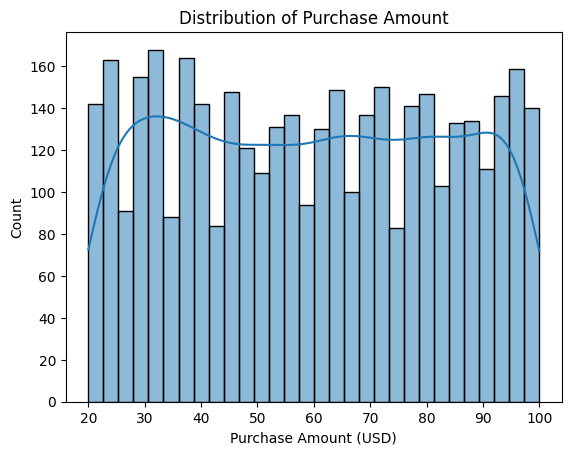

In [10]:
# target column distribution....
print("Performing EDA: Visualizing Target Variable Distribution.")
sns.histplot(df["Purchase Amount (USD)"], bins=30, kde=True)
plt.title("Distribution of Purchase Amount")
plt.show()
# uniform distribution....

## Scaling Numerical Data..
reasons:
- Avoiding Feature Domination
- its imp for Gradient-based models, Distance-based models, and Models that use regularization(L1, L2)

In [11]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()

In [12]:
# df[numerical_columns] = sc.fit_transform(df[numerical_columns])
# df[numerical_columns]

## Categorical Data Encoding
- converting categorical data into numerical..
  

In [13]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [14]:
le = LabelEncoder()
ohe = OneHotEncoder(drop='first') #to remove multicoliniarity 

In [15]:
#Applying Label Encoding...
df['Gender'] = le.fit_transform(df['Gender'])
df['Subscription Status'] = le.fit_transform(df['Subscription Status'])
df['Promo Code Used'] = le.fit_transform(df['Promo Code Used'])
df['Discount Applied'] = le.fit_transform(df['Discount Applied'])

In [16]:
# Applying OneHotEncoding..
encoded_columns = ohe.fit_transform(df[['Item Purchased', 'Category', 'Location', 'Size', 'Color', 
                                        'Season', 'Payment Method', 'Shipping Type', 
                                        'Preferred Payment Method','Frequency of Purchases']]).toarray()

# Converting the encoded columns into a DataFrame...
encoded_df = pd.DataFrame(encoded_columns, columns=ohe.get_feature_names_out())
transformed_df = pd.concat([df, encoded_df], axis=1)

In [17]:
transformed_df

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,...,Preferred Payment Method_Credit Card,Preferred Payment Method_Debit Card,Preferred Payment Method_PayPal,Preferred Payment Method_Venmo,Frequency of Purchases_Bi-Weekly,Frequency of Purchases_Every 3 Months,Frequency of Purchases_Fortnightly,Frequency of Purchases_Monthly,Frequency of Purchases_Quarterly,Frequency of Purchases_Weekly
0,55,1,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,19,1,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,50,1,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,21,1,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,45,1,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,40,0,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3896,52,0,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3897,46,0,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3898,44,0,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [18]:
transformed_df.drop(columns=categorical_columns, axis=1, inplace=True)

In [19]:
transformed_df

,Age,Purchase Amount (USD),Review Rating,Previous Purchases,Item Purchased_Belt,Item Purchased_Blouse,Item Purchased_Boots,Item Purchased_Coat,Item Purchased_Dress,Item Purchased_Gloves,...,Preferred Payment Method_Credit Card,Preferred Payment Method_Debit Card,Preferred Payment Method_PayPal,Preferred Payment Method_Venmo,Frequency of Purchases_Bi-Weekly,Frequency of Purchases_Every 3 Months,Frequency of Purchases_Fortnightly,Frequency of Purchases_Monthly,Frequency of Purchases_Quarterly,Frequency of Purchases_Weekly
0,55,53,3.1,14,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,19,64,3.1,2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,50,73,3.1,23,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,21,90,3.5,49,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,45,49,2.7,31,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,40,28,4.2,32,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3896,52,49,4.5,41,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3897,46,33,2.9,24,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3898,44,77,3.8,24,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [20]:
# input features and target...
X = transformed_df.drop(columns="Purchase Amount (USD)", axis=1)
y = df["Purchase Amount (USD)"]

In [21]:
# Correlation analysis...for reducing multicolinearity...
corr_matrix = X.corr()
#print(corr_matrix)
threshold = 0.5
highly_correlated_features = [
    corr_matrix.columns[j] 
    for i in range(len(corr_matrix.columns)) 
    for j in range(i + 1, len(corr_matrix.columns)) 
    if abs(corr_matrix.iloc[i, j]) > threshold
]
#highly_correlated_features = list(set(highly_correlated_features))
print(highly_correlated_features)

# highly_correlated_features = [corr_matrix.columns[j] for i in range(len(corr_matrix.columns)) for j in range(i + 1, len(corr_matrix.columns)) if abs(corr_matrix.iloc[i, j]) > threshold]
# print(len(highly_correlated_features))

# Droping highly correlated features....
X.drop(columns=highly_correlated_features, inplace=True, errors='ignore')



['Category_Outerwear', 'Category_Outerwear']


In [22]:
# Split data...
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [23]:
X

,Age,Review Rating,Previous Purchases,Item Purchased_Belt,Item Purchased_Blouse,Item Purchased_Boots,Item Purchased_Coat,Item Purchased_Dress,Item Purchased_Gloves,Item Purchased_Handbag,...,Preferred Payment Method_Credit Card,Preferred Payment Method_Debit Card,Preferred Payment Method_PayPal,Preferred Payment Method_Venmo,Frequency of Purchases_Bi-Weekly,Frequency of Purchases_Every 3 Months,Frequency of Purchases_Fortnightly,Frequency of Purchases_Monthly,Frequency of Purchases_Quarterly,Frequency of Purchases_Weekly
0,55,3.1,14,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,19,3.1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,50,3.1,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,21,3.5,49,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,45,2.7,31,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,40,4.2,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3896,52,4.5,41,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3897,46,2.9,24,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3898,44,3.8,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [24]:
# models...
models = {
    "Random Forest": RandomForestRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Linear Regression": LinearRegression(),
    "AdaBoost Regressor": AdaBoostRegressor()
}



In [25]:
# Training and evaluation...
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)  
    y_pred = model.predict(X_test)  
    r2 = r2_score(y_test, y_pred)  
    results[name] = r2



In [26]:
# Display results
results_df = pd.DataFrame(list(results.items()), columns=["Model", "R2 Score"])
print(results_df)


                Model  R2 Score
0       Random Forest -0.042027
1       Decision Tree -0.932909
2   Gradient Boosting -0.022997
3   Linear Regression -0.031418
4  AdaBoost Regressor -0.001179
